In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
from scipy import stats
import datetime as dt

In [6]:
volc = np.genfromtxt('nature14565-s6_sigl2015.csv', delimiter=",", dtype=float)
data_mann_2009 = np.genfromtxt('pdoall_mann_2009.txt', delimiter=",", dtype=float) # nino3 reconstruction
yy_mann_ann = data_mann_2009[:,0]
pdo_mann_ann = data_mann_2009[:,1]

In [18]:
from scipy.signal import butter, lfilter


def butter_lowpass(lowcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    b, a = butter(order, low, btype='low', analog=False)
    return b, a


def butter_lowpass_filter(data, lowcut, fs, order=5):
    b, a = butter_lowpass(lowcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


In [19]:
fs = 1 # 120 data points collected per 10 years
lowcut = 1/8
pdo_filt = butter_lowpass_filter(pdo_mann_ann, lowcut, fs, order=4)

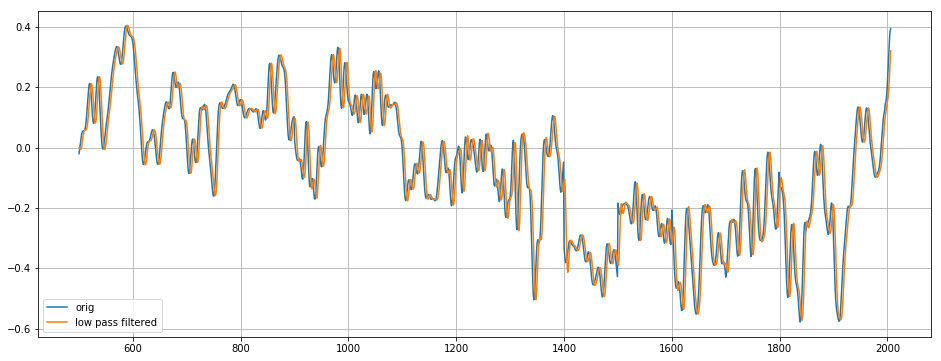

In [20]:
plt.figure(figsize=(16,6))
plt.plot(yy_mann_ann, pdo_mann_ann, label='orig')
plt.plot(yy_mann_ann, pdo_filt, label='low pass filtered')
plt.legend()
plt.grid()

In [21]:
pdo_filt[pdo_filt<0] = -1.0
pdo_filt[pdo_filt>0] = 1.0

pdo_mann_2009_anom_yy = np.zeros((pdo_filt.shape[0],2))
pdo_mann_2009_anom_yy[:,0] = yy_mann_ann[:]
pdo_mann_2009_anom_yy[:,1] = pdo_filt[:]
np.savetxt('pdo_mann_2009_anom_yy.txt', pdo_mann_2009_anom_yy, delimiter=",")